In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sqlite3
import pandas as pd
import shutil
import requests

In [2]:
db_path = '../app/data/user_images.db'

In [3]:
db_path_exists = os.path.isfile(db_path)
db_path_exists

True

In [7]:

conn = sqlite3.connect(db_path)

query = "SELECT * FROM user_images ORDER BY created_at DESC"

df = pd.read_sql_query(query, conn)
conn.close()

In [8]:
display_df = df.copy()
display_df['image_url'] = 'XXXXXXX'
display(display_df)

,ts,image_url,created_at,sex
0,1728958660,XXXXXXX,2024-10-15 02:17:40.000000,None
1,1728957588,XXXXXXX,2024-10-15 01:59:48.000000,None
2,1728956998,XXXXXXX,2024-10-15 01:49:58.000000,None
3,1728956127,XXXXXXX,2024-10-15 01:35:27.000000,None
4,1728955859,XXXXXXX,2024-10-15 01:30:59.000000,None
...,...,...,...,...
335,1728018257,XXXXXXX,2024-10-04 05:04:17.000000,None
336,1728012569,XXXXXXX,2024-10-04 03:29:29.000000,None
337,1728011712,XXXXXXX,2024-10-04 03:15:12.000000,None
338,1728010818,XXXXXXX,2024-10-04 03:00:18.000000,None


In [ ]:
urls = list(df['image_url'].tail(5))
urls

### Downloading images from dataset

In [15]:
for idx, url in enumerate(urls):
    response = requests.get(url, stream=True)
    with open(f'imgs/img{idx}.png', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

### Displaying images

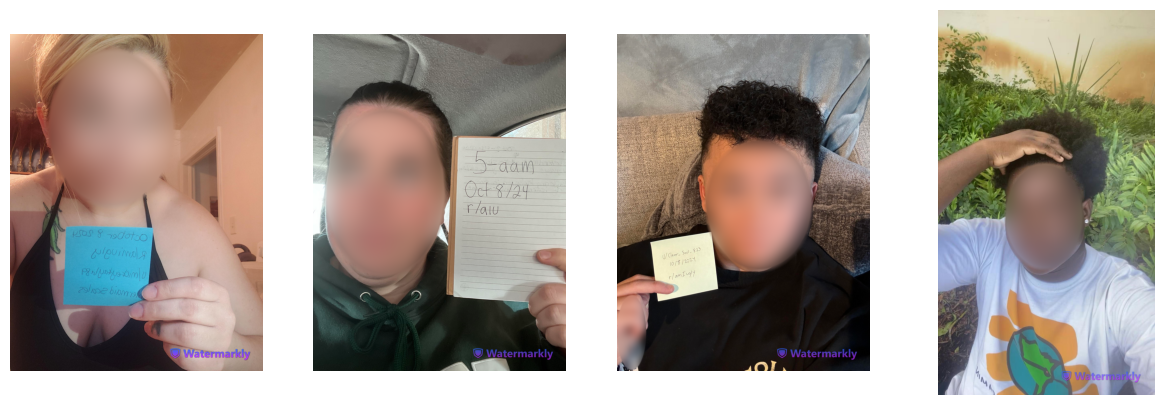

In [24]:
img_dir = 'imgs'
img_files = ['img1.png', 'img2.png', 'img3.png', 'img4.png']

plt.figure(figsize=(15, 5))

for i, img_file in enumerate(img_files):
    img_path = os.path.join(img_dir, img_file)
    img = mpimg.imread(img_path)
    plt.subplot(1, len(img_files), i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()
